In [4]:
from tqdm.notebook import tqdm 
from collections import Counter 
import os 
import time 

# Лабораторна робота 3. Групи, порядок елемента в групі

_Примітка_: наведений код є лише одним з можливих шаблонів виконання. Можете писати по-своєму, але розділяйте свій код на функції, щоб їх можна було простіше перевіряти.

## Завдання 1. 

__Задайте групи $D_{10}$, $Z_{16}$, $A_5$, $SL(2, \mathbb{Z}_3)$*. Для кожної з них виведіть таблицю Келі, знайдіть порядок групи, перевірте чи група абелева. Перевірте чи будуть ізоморфними групи $SL(2, Z_3)$ та $D_{12}$.__

*: група матриць 2х2 з визначником 1 над полем $\mathbb{Z}_3$

In [2]:
# ваш код тут 

def describe(group, file):
    print('\n\n==================================', file=file)
    print('Group', group, 'which is isomorphic to ', group.structure_description(), file=file)
    print(ascii_art(group.cayley_table()), file=file)
    print('group is abelian:', group.is_abelian(), file=file)
    print('order of group:', group.order(), file=file)
    print('==================================\n\n', file=file)
    

folder = './lab03_assets/'
os.makedirs(folder, exist_ok=True)

with open(folder + 'task1_output.txt', 'w') as file: 
    for G in [
        DihedralGroup(10), 
        CyclicPermutationGroup(16), 
        AlternatingGroup(5), 
        SL(2, Integers(3)),
    ]: 
        describe(G, file)


In [3]:
!head lab03_assets/task1_output.txt
!echo "..."
!echo "..."
!echo "..."
!tail lab03_assets/task1_output.txt



Group Dihedral group of order 20 as a permutation group which is isomorphic to  D10
*  a b c d e f g h i j k l m n o p q r s t
 +----------------------------------------
a| a b c d e f g h i j k l m n o p q r s t
b| b a d c f e h g j i l k n m p o r q t s
c| c s a e d g f i h k j m l o n q p t b r
d| d t b f c h e j g l i n k p m r o s a q
...
...
...
t| x r u k n h t b j q a m w c g o v f l p e i s d
u| v p s j m g u a l r c o x b i n w d k q f h t e
v| n k h u r x v o f s i d p l e j b t g c w m a q
w| m j g s p v w n d t h e q k f l a u i b x o c r
x| o l i t q w x m e u g f r j d k c s h a v n b p
group is abelian: False
order of group: 24




## Завдання 2. 

__Знайдіть к-ть елементів кожного можливого порядку в групах $S_{100}$ та $A_{100}$.__

___Зауваження___: вивід буде великий, збережіть його в окремий текстовий файл

___Зауваження 2___: оцініть спершу к-ть елементів в групі, а потім ще раз подумайте чи варто тут писати повний перебір

-----

Нехай маємо елемент групи підстановок $g \in S_n$. Запишемо його як добуток незалежних циклів $g = c_1 c_2 \dots c_k$. Тоді порядок елемента записується як найменше спільне кратне довжин циклів: 

$$order(g) = lcm(len(c_1), len(c_2), \dots len(c_k))$$

Отже, порядок елемента залежить виключно від довжин циклів. Це рівносильно задачі знайти всі розбиття числа $n$ на суму довільної к-ті додатніх чисел, також знаної як [Integer Partitions](https://en.wikipedia.org/wiki/Integer_partition).

Заилишилось лише визначити скільки елементів у групі $S_n$ мають задані довжини незалежних циклів $(c_1, c_2, c_3, \dots c_k)$, i.e. мають заданий ___цикловий тип___.

In [4]:
el = SymmetricGroup(100).random_element()
el.cycle_type()

[48, 39, 6, 6, 1]

In [5]:
el

(1,62,19,86,78,74,59,72,57,94,30,34,100,90,42,77,56,95,98,51,81,10,83,2,93,82,63,54,97,17,69,73,75,7,89,67,65,50,45)(3,33,9,55,43,44)(4,21,20,38,14,24,60,85,8,53,36,52,6,22,66,99,92,64,58,96,49,80,35,23,25,13,15,26,11,87,79,12,61,16,27,28,68,48,41,29,84,88,70,18,40,46,76,47)(5,39,31,32,91,71)

In [1]:
factorials = [factorial(i) for i in range(100)]


def number(partition, n):
    """К-ть підстановок у групі S_n заданого циклового типу. 
    """
    res = 1
    for length in partition:
        # обираємо c_i чисел із тих, що лишились. Їх порядок важливий з точністю до зсува
        res *= binomial(n, length) * factorials[length - 1]

        # зменшуємо к-ть чисел 
        n -= length 
    
    # цикли однакової довжини можна міняти місцями, тому треба поділити на факторіали їх кількостей
    for amount in Counter(partition).values():
        res /= factorials[amount]
    return res

In [7]:
number([1, 2, 3, 4], 10)

151200

In [8]:
# перевірим брутфорсом правильність 
res = 0 
for el in tqdm(SymmetricGroup(10), total=int(factorial(10))): 
    if sorted(el.cycle_type()) == [1, 2, 3, 4]: 
        res += 1 
res

  0%|          | 0/3628800 [00:00<?, ?it/s]

151200

#### перевіримо, що розбиття числа дійсно швидше рахуються за класи спряженості

In [11]:
n = 30
G = SymmetricGroup(n)
t = time.time() 
G.conjugacy_classes_representatives()
print('elapsed:', time.time() - t)

t = time.time() 
list(Partitions(n))
print('elapsed:', time.time() - t)

elapsed: 19.273133993148804
elapsed: 0.016655683517456055


### Оцінка проблеми

In [79]:
# к-ть різних розбиттів, взято з https://math.stackexchange.com/questions/2675382/calculating-integer-partitions
# сама послідовність a(n) є в базі OEIS: https://oeis.org/A000041

def pentagonal_number(k):
    return int(k*(3*k-1) / 2)

def compute_partitions(goal):
    partitions = [1]
    for n in range(1,goal+1):
        partitions.append(0)
        for k in range(1,n+1):
            coeff = (-1)**(k+1)
            for t in [pentagonal_number(k), pentagonal_number(-k)]:
                if (n-t) >= 0:
                    partitions[n] = partitions[n] + coeff*partitions[n-t]
    return partitions

compute_partitions(100)[-2:]

[169229875, 190569292]

In [80]:
# насправді є метод для цього, просто я його пізніше знайшов 
Partitions(100).cardinality()

190569292

#### Отже, нам треба буде перебрати 190млн різних розбиттів і для кожного порахувати к-ть підстановок з таким цикловим типом. Оцінимо скільки часу це займе.

In [22]:
import numpy as np 

res = []

for _ in range(100):
    el = Partitions(100).random_element()
    t = time.time() 
    number(partition=el, n=100)
    res.append(time.time() - t)

print(f'elapsed: {np.mean(res):.5f}s +- {np.std(res):.5f}')

mean_hours = (np.mean(res) * 190569292) / 3600
std_hours = np.std(res) * 190569292 / 3600
print(f'estimated time: {mean_hours:.2f}h +- {std_hours:.2f}h')

elapsed: 0.00040s +- 0.00099
estimated time: 21.30h +- 52.21h


#### Результат трохи невтішний. Прогнозується 20 годин з великим розкидом на роботу алгоритму. Спробуємо оптимізувати функцію 

In [15]:
factors_cached = [0] + [list(factor(i)) for i in range(1, 101)]
primes = [0] + [el in Primes(101) for el in range(1, 101)]


def number_optimized(partition, n, factorize=False): 
    # дільники результуючого числа, якщо множимо на дільник, то +1
    # якщо ділимо, то -1
    res_factors = [0 for _ in range(n+1)]
    n_backup = n
    counter = [0 for _ in range(n+1)]
    for length in partition: 
        
        for i in range(1, n+1):    # * n!
            res_factors[i] += 1
        
        for i in range(1, n-length+1):   # / (n-k)!
            res_factors[i] -= 1
            
        res_factors[length] -= 1      # / k
        n -= length
        counter[length] += 1          # замість Counter 

    n = n_backup
    
    for amount in counter:
        if amount == 1 or amount == 0: continue 
        for i in range(1, amount+1):
            res_factors[i] -= 1

    # варіант з розкладанням на прості множники, щоб більше скоротити. Працює довше
    if factorize:
        for i in range(2, n+1):
            if primes[i]: continue 
            if not res_factors[i]: continue
    
            i_amount = res_factors[i]
            for fact, f_amount in factors_cached[i]: 
                res_factors[fact] += f_amount * i_amount
            res_factors[i] -= i_amount
            
    res = 1

    # чисельник
    for i in range(2, n+1): 
        if res_factors[i] > 0:
            res *= (i ** res_factors[i])
    # знаменник
    for i in range(2, n+1):
        if res_factors[i] < 0:    
            # використовуємо цілочисельне ділення, бо результат точно буде цілим числом
            # робимо це другим циклом, оскільки великі дільники можуть розкладатись на менші
            res //= (i ** (-res_factors[i]))
    return res, res_factors

In [21]:
import numpy as np 

res = []

for _ in range(100):
    el = Partitions(100).random_element()
    t = time.time() 
    number_optimized(partition=el, n=100)
    res.append(time.time() - t)

print(f'elapsed: {np.mean(res):.5f}s +- {np.std(res):.5f}')

mean_hours = (np.mean(res) * 190569292) / 3600
std_hours = np.std(res) * 190569292 / 3600
print(f'estimated time: {mean_hours:.2f}h +- {std_hours:.2f}h')

elapsed: 0.00019s +- 0.00014
estimated time: 9.89h +- 7.63h


#### вже краще, але всеодно довго

Є момент, що __сейдж в юпітері працює довше, ніж скриптом__. Тому спробуємо запустити в терміналі файл [number_optimized](./lab03_assets/number_optimized.sage).

In [25]:
!sage ./lab03_assets/number_optimized.sage

elapsed: 0.00004s +- 0.00001
estimated time: 2.09h +- 0.27h


#### Стало ще краще, але цікаво чи зможемо витягнути більше.

Очевидний підхід -- написати функцію `number_optimized` на с++ (оскільки це просто кілька циклів) і використати її з пайтона, бо с++ не вміє з коробки працювати з великими цілими числами, а ми всі ліниві. 

In [30]:
!bat --theme=GitHub ./lab03_assets/cycletype.cpp

───────┬────────────────────────────────────────────────────────────────────────
       │ File: ./lab03_assets/cycletype.cpp
───────┼────────────────────────────────────────────────────────────────────────
   1   │ 
   2   │ #include <vector>
   3   │ #include <iostream>
   4   │ 
   5   │ 
   6   │ // пайтон вміє працювати тільки з С, тому треба зробити обгортку без st
       │ d бібліотеки
   7   │ // тобто всякі вектори і мапи можна використовувати всередині функції, 
       │ але її
   8   │ // сигнатура повинна бути суто сішною (зокрема, ніяких посилань через &
       │ )
   9   │ extern "C"{
  10   │     int* symmetric_factors(int *partition, int size, int n){
  11   │         int* res_factors = new int[n+1];
  12   │         int* counter = new int[n+1];
  13   │         int n_backup = n;
  14   │         for (int length_num = 0; length_num < size; length_num++) {
  15   │             int length = partition[length_num];
  16   │             for (int i = n - length + 1; i < n+1; i

In [38]:
!g++ -o ./lab03_assets/cycletype ./lab03_assets/cycletype.cpp &> /dev/null

#### найпростіший спосіб викликати с++ код з пайтона -- використати так званий пайпінг.

Пайпінг в Unix системах (pipe = труба) -- це комунікація двох і більше програм, коли вивід однієї передається як ввід іншої. В Windows теж присутній. Викликається з командного рядку у вигляді `program1 | program2`

In [43]:
!echo "98 1 1 -1" | ./lab03_assets/cycletype

0 -1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 
-1


Тобто комунікація буде така: 


```mermaid

graph LR; 
    generate.sage --> cycletype.cpp
    cycletype.cpp --> product.py 
```

(гітхаб не вміє відображати мермаід діаграми, тому тримайте картинку)

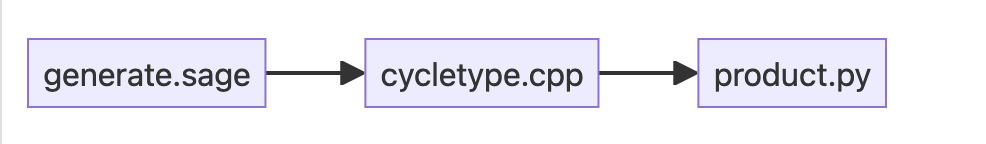

[generate.sage](./lab03_assets/generate.sage) буде генерувати розбиття чисел, [cycletype.cpp](./lab03_assets/cycletype.cpp) рахувати дільники результуючого числа, а [product.py](./lab03_assets/product.py) просто множити їх:

In [55]:
!bat --theme=GitHub lab03_assets/product.py

───────┬────────────────────────────────────────────────────────────────────────
       │ File: lab03_assets/product.py
───────┼────────────────────────────────────────────────────────────────────────
   1   │ 
   2   │ import sys
   3   │ from tqdm import tqdm
   4   │ 
   5   │ 
   6   │ # заготовочка, щоб можна було потім використати кілька процесів
   7   │ if len(sys.argv) > 1:
   8   │     workers = int(sys.argv[1])
   9   │     num_worker = int(sys.argv[2])
  10   │ else:
  11   │     workers = 1
  12   │     num_worker = 1
  13   │ 
  14   │ 
  15   │ full = 190569292
  16   │ 
  17   │ res_orders = set()
  18   │ 
  19   │ # tqdm дає красивий прогресбар, але йому треба знати повну кількість пе
       │ реборів
  20   │ for _ in tqdm(range((full//workers) + 2)):
  21   │ 
  22   │     # той самий input().split() з єолімпа
  23   │     x = list(map(int, input().split()))
  24   │     if x[0] == -1:
  25   │         break
  26   │ 
  27   │     res = 1
  28   │     for i in range

#### перевіримо значення

In [73]:
!echo "98 1 1 -1" | ./lab03_assets/cycletype | python ./lab03_assets/product.py

  0%|                                | 1/190569294 [00:00<5:13:30, 10131.17it/s]
476154160428286493273975708450340308626101878899906231982617162730702040781785283719089101919165909623743356738914406929852985769984000000000000000000000000


In [54]:
number_optimized([98, 1, 1], 100)[0]

476154160428286493273975708450340308626101878899906231982617162730702040781785283719089101919165909623743356738914406929852985769984000000000000000000000000

In [5]:
number([98, 1, 1], 100)

476154160428286493273975708450340308626101878899906231982617162730702040781785283719089101919165909623743356738914406929852985769984000000000000000000000000

#### оцінимо час виконання, запустивши з tqdm на кілька секунд

In [77]:
!sage ./lab03_assets/generate.sage | ./lab03_assets/cycletype | python ./lab03_assets/product.py

  0%|                           | 112058/190569294 [00:06<2:52:28, 18404.38it/s]
Traceback (most recent call last):
  File "/Users/davendiy/Documents/work/teaching/group_theory/sage-labs2024/answers/./lab03_assets/product.py", line 28, in <module>
    for i in range(2, 100+1):
KeyboardInterrupt
Traceback (most recent call last):
  File "/Users/davendiy/Documents/work/teaching/group_theory/sage-labs2024/answers/./lab03_assets/generate.sage.py", line 26, in <module>
    print(*el)
  File "src/cysignals/signals.pyx", line 341, in cysignals.signals.python_check_interrupt
KeyboardInterrupt


#### в терміналі чомусь працює всеодно швидше і видає ~1:24:30, на відміну від верхніх ~2:09:21. Підозрюю це через пайпінг

### Цікаво, чи можна швидше? 

Гіпотеза: найбільше забирає часу генерація розбиттів, оскільки вони написані на сейджі, а не с++. Див файл: https://github.com/sagemath/sage/blob/develop/src/sage/combinat/partition.py

Спробуємо чисту [імплементацію](./lab03_assets/pure.cpp) на С++, з одним лиш множенням на пайтоні. 

In [105]:
!g++ -o ./lab03_assets/pure ./lab03_assets/pure.cpp &> /dev/null 
!./lab03_assets/pure | python ./lab03_assets/product.py

  0%|                           | 140601/190569294 [00:04<1:31:29, 34688.35it/s]
Traceback (most recent call last):
  File "/Users/davendiy/Documents/work/teaching/group_theory/sage-labs2024/answers/./lab03_assets/product.py", line 30, in <module>
    res *= i ** x[i]
KeyboardInterrupt


#### Показує ~1:39 в жупітері і ~1:05 в терміналі. 

Насправді я вас трошки наобманював і розбиття написані на Cython: https://github.com/sagemath/sage/blob/develop/src/sage/combinat/partitions.pyx#L204 

(попередній файл містить тільки класи-обгортки)

Сайтон компілюється і по швидкості дуже близький до С++, тому гіпотетично півгодини прибрало саме копіювання масивів між програмами. Спробуємо інший підхід до використання с++ в пайтоні, щоб пересвідчитись в цьому. 

### Використання с++ кода через CDLL 

На моєму досвіді, найпростішим після пайпінгу варіантом використання с++ є компіляція його в статичну бібліотеку, а потім використання через CDLL. Основний мінус: дуже просто зловити segfault 

___Зауваження___: цей метод є platform dependent, тому версії для юнікса і віндовса будуть відрізнятись. Повний імпорт можете глянути в [cycletype_import.py](./lab03_assets/cycletype_import.py)

In [99]:
!bat --theme=GitHub -l py ./lab03_assets/cycletype.sage

───────┬────────────────────────────────────────────────────────────────────────
       │ File: ./lab03_assets/cycletype.sage
───────┼────────────────────────────────────────────────────────────────────────
   1   │ import sys
   2   │ 
   3   │ from tqdm import tqdm
   4   │ 
   5   │ 
   6   │ # стандартна пайтонівська бібліотека
   7   │ import ctypes
   8   │ from ctypes import CDLL
   9   │ 
  10   │ 
  11   │ # заготовочка на кілька воркерів
  12   │ if len(sys.argv) > 1:
  13   │     workers = int(sys.argv[1])
  14   │     num_worker = int(sys.argv[2])
  15   │ else:
  16   │     workers = 1
  17   │     num_worker = 0
  18   │ 
  19   │ 
  20   │ # створюємо С бібліотеку з статичного файлу
  21   │ # зауваження: це platform depended штука, тобто на віндовсі буде не так
  22   │ cycle_types = CDLL('cycletype.so')
  23   │ 
  24   │ 
  25   │ # прописуємо сигнатуру функцій, бо пайтон не вміє сам її визначати
  26   │ cycle_types.symmetric_factors.argtypes = (ctypes.POINTER(ctypes

In [103]:
# компілюємо як статичну бібліотеку
!g++ -shared -o ./lab03_assets/cycletype.so -fPIC ./lab03_assets/cycletype.cpp  &> /dev/null 
!sage ./lab03_assets/cycletype.sage

[*] Starting calculation for #0 worker of 1 total.
  0%|                           | 129925/190569292 [00:04<1:43:02, 30801.42it/s]
Traceback (most recent call last):
  File "/Users/davendiy/Documents/work/teaching/group_theory/sage-labs2024/answers/./lab03_assets/cycletype.sage.py", line 77, in <module>
    amount = symmetric_factors(part, _sage_const_100 )
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/davendiy/Documents/work/teaching/group_theory/sage-labs2024/answers/./lab03_assets/cycletype.sage.py", line -1, in symmetric_factors
  File "src/cysignals/signals.pyx", line 341, in cysignals.signals.python_check_interrupt
KeyboardInterrupt


#### Показує ті самі ~1:40 в жупітері і ~1:05 в терміналі. 

Отже, можна зробити висновок, що сейджовська версі таки дійсно написана оптимально. Можна пробувати поліпшувати ще код, але навіщо, якщо можна запустити в 6 воркерів і отримати нормальні 10 хвилин? 

In [104]:
# просто запускаємо в 6х різних терміналах команди
# (і надіємось, що не вилетить по оперативці)
!sage ./lab03_assets/cycletype.sage 6 0 
!sage ./lab03_assets/cycletype.sage 6 1
!sage ./lab03_assets/cycletype.sage 6 2 
!sage ./lab03_assets/cycletype.sage 6 3 
!sage ./lab03_assets/cycletype.sage 6 4 
!sage ./lab03_assets/cycletype.sage 6 5 


# примітка: на макбуку еір м2 після 4-х воркерів починає деградувати 
# час виконання. На ноуті з Ryzen 7 5800H і убунтою сейджова версія стає 
# навіть швидшою за с++, але РАПТОМ повільнішою за еір м2. 
# тим не менш, лінуксовий ноут дозволяє запустити в 12 воркерів і отримати прекрасні 5хв 
#❯ ./lab03_assets/pure 12 0 | python lab03_assets/product.py 12 0
#  0%|▌            | 51041/15880776 [00:01<05:55, 44548.59it/s]

## Завдання 3. 
___Для заданих натуральних $n, k$ ($1 <= n \le 1 000 000, 1 \le k \le n!$) визначте чи існує в групі $S_n$ елемент порядку $k$.___

----------

___Зауваження:___ зверніть увагу на межі, в яких задано $n, k$. 

In [ ]:
# ваш код тут